In [1]:
import sleep_study as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
ss.init()
raw = ss.data.load_study('18685_16246', exclude=['Patient Event'])
sfreq = raw.info['sfreq']
print(raw.ch_names)
channels = ['EOG LOC-M2', 'EOG ROC-M1', 'EEG F3-M2','EEG F4-M1',
             'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 
            'EEG CZ-O1', 'EMG CHIN1-CHIN2','RATE','SNORE', 
            'SNORE_DR', 'ECG LA-RA', 'OSAT','ETCO2', 
            'TCCO2', 'CAPNO','FLOW_DR','RESP FLOW', 'XFLOW', 
             'RESP CHEST', 'RESP ABDOMEN',
            'EMG LLEG+-LLEG-', 'EMG RLEG+-RLEG-', 
              'RESP RATE', 'C-FLOW', 'C-PRESSURE']

age information stored in /home/harlinl/sleep_study_harlin/age_file.csv
['EOG LOC-M2', 'EOG ROC-M1', 'EMG CHIN1-CHIN2', 'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1', 'EMG LLEG+-LLEG-', 'EMG RLEG+-RLEG-', 'ECG LA-RA', 'SNORE', 'SNORE_DR', 'FLOW_DR', 'RESP FLOW', 'XFLOW', 'RESP CHEST', 'RESP ABDOMEN', 'OSAT', 'RATE', 'ETCO2', 'CAPNO', 'RESP RATE', 'TCCO2', 'C-FLOW', 'C-PRESSURE']


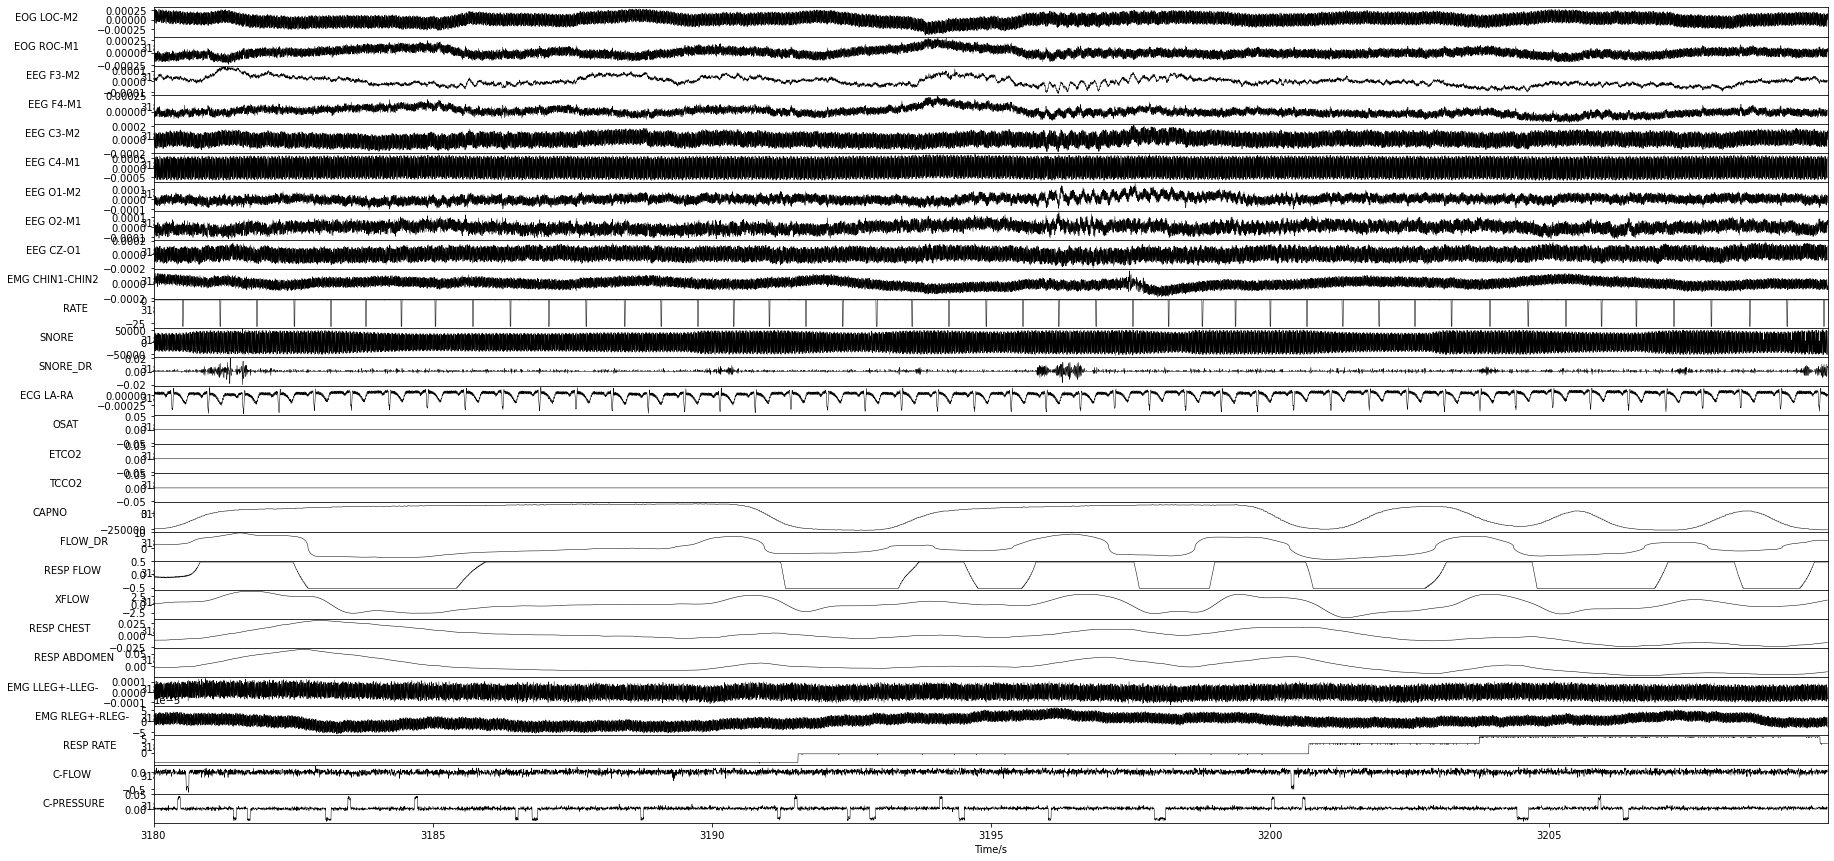

In [3]:
start = np.floor(raw.annotations[23]['onset']+813.0 - 3)
indices = raw.time_as_index([start, start+30])
x = np.arange(start, start+30, 1/sfreq)

data = raw.get_data(channels, start=indices[0], stop=indices[1])

fig, axs = plt.subplots(len(data), 1, figsize=(30,15))
for i in range(len(data)):
    y = data[i] - data[i].mean()
    axs[i].plot(x, y, 'black', linewidth=0.5)
    axs[i].set_ylabel(channels[i], labelpad=50, rotation=0)
    plt.subplots_adjust(wspace=0, hspace=0)
    axs[i].margins(x=0)
    
plt.xlabel('Time/s')    
plt.savefig('18685_16246_vis.png')

In [4]:
ID = 18685
print(ss.info.HEALTH_DATA_FNS)

for name in ss.info.HEALTH_DATA_FNS:
    df = ss.info.load_health_info(name)
    print(name, df.columns)
    rows = df.loc[df['STUDY_PAT_ID'] == ID]
    print(len(rows))
    rows.to_csv(str(ID) + '_' + name, index=False)

['DEMOGRAPHIC.csv', 'DIAGNOSIS.csv', 'ENCOUNTER.csv', 'MEASUREMENT.csv', 'MEDICATION.csv', 'PROCEDURE_SURG_HX.csv', 'PROCEDURE.csv', 'SLEEP_ENC_ID.csv', 'SLEEP_STUDY.csv']
DEMOGRAPHIC.csv Index(['STUDY_PAT_ID', 'BIRTH_DATE', 'PCORI_GENDER_CD', 'PCORI_RACE_CD',
       'PCORI_HISPANIC_CD', 'GENDER_DESCR', 'RACE_DESCR', 'ETHNICITY_DESCR',
       'LANGUAGE_DESCR', 'PEDS_GEST_AGE_NUM_WEEKS', 'PEDS_GEST_AGE_NUM_DAYS'],
      dtype='object')
1


/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


DIAGNOSIS.csv Index(['STUDY_DX_ID', 'STUDY_ENC_ID', 'STUDY_PAT_ID', 'DX_START_DATETIME',
       'DX_END_DATETIME', 'DX_SOURCE_TYPE', 'DX_ENC_TYPE', 'DX_CODE_TYPE',
       'DX_CODE', 'DX_NAME', 'DX_ALT_CODE', 'CLASS_OF_PROBLEM', 'CHRONIC_YN',
       'PROV_ID'],
      dtype='object')
103


/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (12,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ENCOUNTER.csv Index(['STUDY_ENC_ID', 'STUDY_PAT_ID', 'ENCOUNTER_DATE',
       'VISIT_START_DATETIME', 'VISIT_END_DATETIME', 'ADT_ARRIVAL_DATETIME',
       'ED_DEPARTURE_DATETIME', 'ENCOUNTER_TYPE', 'VISIT_TYPE_CD',
       'VISIT_TYPE_DESCR', 'ICU_VISIT_YN', 'PROV_ID', 'PROV_TYPE', 'DEPT_ID',
       'DEPT_SPECIALTY', 'ADMIT_SOURCE', 'HOSP_ADMIT_SOURCE',
       'DISCHARGE_DISPOSITION', 'DISCHARGE_DESTINATION', 'DRG_CODE',
       'DRG_NAME', 'VISIT_REASON'],
      dtype='object')
49
MEASUREMENT.csv Index(['STUDY_MEAS_ID', 'STUDY_PAT_ID', 'STUDY_ENC_ID',
       'MEAS_RECORDED_DATETIME', 'MEAS_TYPE', 'MEAS_VALUE_NUMBER',
       'MEAS_VALUE_TEXT', 'MEAS_SOURCE', 'STUDY_PROV_ID'],
      dtype='object')
31


/home/harlinl/anaconda3/envs/py3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


MEDICATION.csv Index(['STUDY_MED_ID', 'STUDY_ENC_ID', 'STUDY_PAT_ID', 'MED_START_DATETIME',
       'MED_END_DATETIME', 'MED_ORDER_DATETIME', 'MED_TAKEN_DATETIME',
       'MED_SOURCE_TYPE', 'QUANTITY', 'DAYS_SUPPLY', 'FREQUENCY',
       'EFFECTIVE_DRUG_DOSE', 'EFF_DRUG_DOSE_SOURCE_VALUE', 'DRUG_DOSE_UNIT',
       'REFILLS', 'RXNORM_CODE', 'RXNORM_TERM_TYPE', 'MEDICATION_DESCR',
       'GENERIC_DRUG_DESCR', 'DRUG_ORDER_STATUS', 'DRUG_ACTION', 'ROUTE',
       'ROUTE_SOURCE_VALUE', 'PRESCRIBING_PROV_ID', 'PHARM_CLASS',
       'PHARM_SUBCLASS', 'THERA_CLASS', 'THERA_SUBCLASS'],
      dtype='object')
18
PROCEDURE_SURG_HX.csv Index(['STUDY_SURGHX_ID', 'STUDY_PAT_ID', 'PROC_NOTED_DATE', 'PROC_START_TIME',
       'PROC_END_TIME', 'PROC_CODE', 'CPT_CODE', 'PROC_DESCR'],
      dtype='object')
1
PROCEDURE.csv Index(['STUDY_PROC_ID', 'STUDY_PAT_ID', 'STUDY_ENC_ID', 'PROCEDURE_DATETIME',
       'STUDY_PROV_ID', 'PROC_ID_NCH', 'PROC_CODE', 'PROC_CODE_TYPE',
       'PROC_DESCR'],
      dtype='object')